A notebook for processing images acquired with the OROCHI simulator to reflectance, with coalignment by stereo geometric calibration.

In [23]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Overview

The steps of processing are:
1. Calibration Preparation:
    - Load, average and bias correct Calibration Target images
    - Correct for exposure
    - Load reference reflectance for each channel
    - Scale images to give reflectance calibration coefficient for each pixel
    - Optional: mask for Calibration Target
    - Save reflectance calibration images
2. Sample Reflectance Calibration
    - Load, average and bias correct Sample images
    - Correct for exposure
    - Apply calibration coefficient frames
    - Optional: mask for Calibration Target area and Sample area.
    - Save reflectance images
3. Geometric Alignment
    - Load, average and bias correct Geometric images
    - Balance images (TBD)
    - Extract camera geometric calibration coefficients (TBD)
    - Apply image coregistration (TBD)

# Setup

In [24]:
import orochi_sim_proc as osp
from pathlib import Path

# Calibration Preparation
For each channel:
- Load, average and bias correct Calibration Target images
- Correct for exposure
- Load reference reflectance for each channel
- Scale images to give reflectance calibration coefficient for each pixel
- Optional: mask for Calibration Target
- Save reflectance calibration images

0_650


/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:294: RuntimeWarning: divide by zero encountered in divide
  def __init__(self, source_image: LightImage, roi: bool=False) -> None:
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:295: RuntimeWarning: divide by zero encountered in divide
  self.dir = source_image.dir
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:296: RuntimeWarning: invalid value encountered in divide
  # TODO check subject directory exists


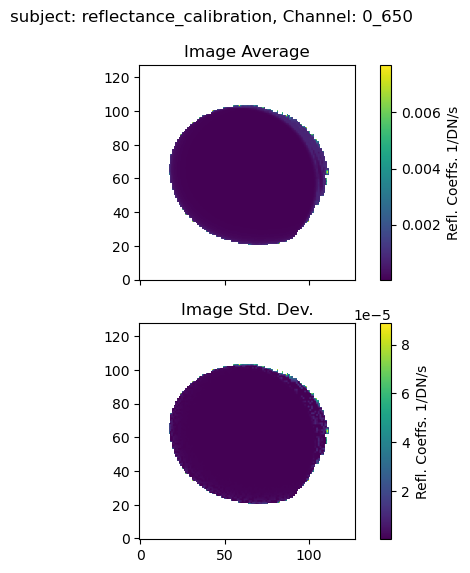

1_475


/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:294: RuntimeWarning: divide by zero encountered in divide
  def __init__(self, source_image: LightImage, roi: bool=False) -> None:
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:295: RuntimeWarning: divide by zero encountered in divide
  self.dir = source_image.dir
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:296: RuntimeWarning: invalid value encountered in divide
  # TODO check subject directory exists


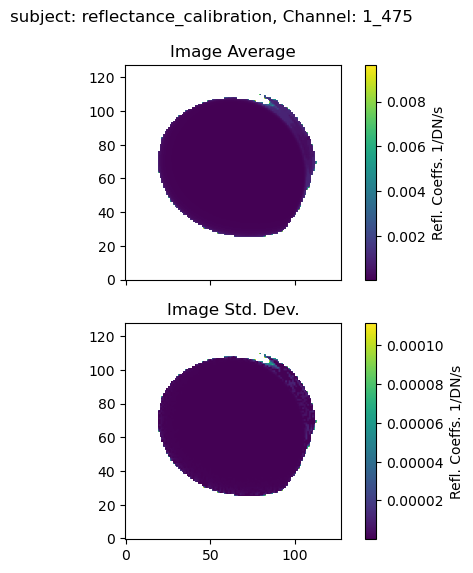

2_550


/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:294: RuntimeWarning: divide by zero encountered in divide
  def __init__(self, source_image: LightImage, roi: bool=False) -> None:
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:295: RuntimeWarning: divide by zero encountered in divide
  self.dir = source_image.dir
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:296: RuntimeWarning: invalid value encountered in divide
  # TODO check subject directory exists


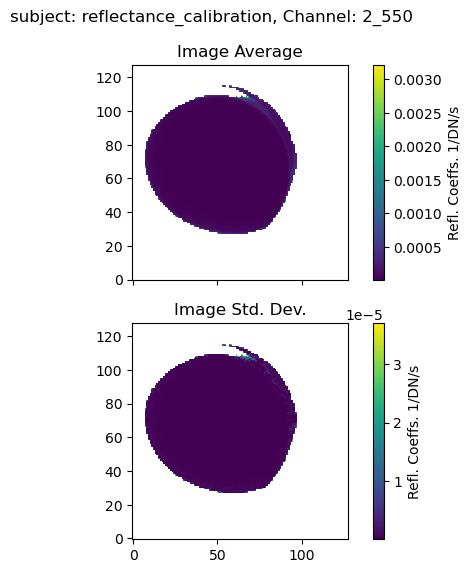

3_400


/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:294: RuntimeWarning: divide by zero encountered in divide
  def __init__(self, source_image: LightImage, roi: bool=False) -> None:
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:295: RuntimeWarning: divide by zero encountered in divide
  self.dir = source_image.dir
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:296: RuntimeWarning: invalid value encountered in divide
  # TODO check subject directory exists


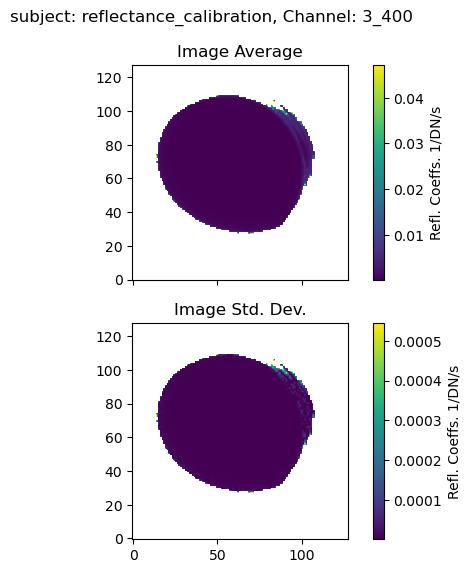

4_725


/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:294: RuntimeWarning: divide by zero encountered in divide
  def __init__(self, source_image: LightImage, roi: bool=False) -> None:
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:295: RuntimeWarning: divide by zero encountered in divide
  self.dir = source_image.dir
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:296: RuntimeWarning: invalid value encountered in divide
  # TODO check subject directory exists


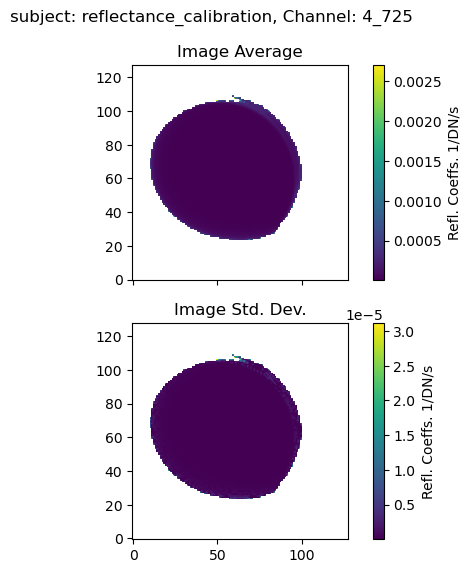

5_850


/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:294: RuntimeWarning: divide by zero encountered in divide
  def __init__(self, source_image: LightImage, roi: bool=False) -> None:
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:295: RuntimeWarning: divide by zero encountered in divide
  self.dir = source_image.dir
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:296: RuntimeWarning: invalid value encountered in divide
  # TODO check subject directory exists


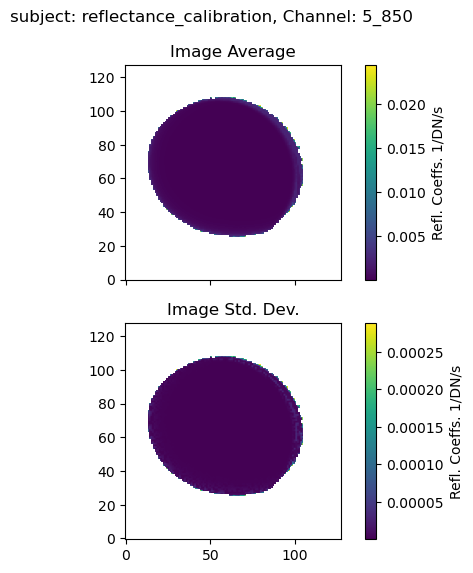

7_950


/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:294: RuntimeWarning: divide by zero encountered in divide
  def __init__(self, source_image: LightImage, roi: bool=False) -> None:
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:295: RuntimeWarning: divide by zero encountered in divide
  self.dir = source_image.dir
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:296: RuntimeWarning: invalid value encountered in divide
  # TODO check subject directory exists


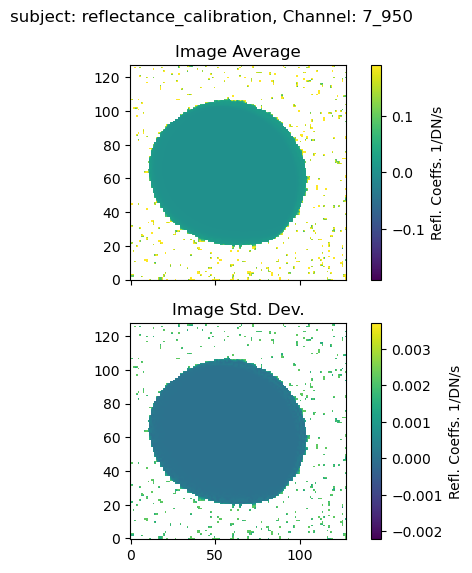

In [31]:
target = 'reflectance_calibration'
channels = sorted(list(Path('..', 'data', target).glob('[!.]*')))
cali_coeffs = {} # store the calibration objects in a dictionary
for channel_path in channels:
    channel = channel_path.name
    print(channel)
    # load the calibration target images
    cali = osp.LightImage(target, channel)
    cali.image_load()
    # check the mean level

    # load the calibration target dark frames
    dark_cali = osp.DarkImage(target, channel)
    dark_cali.image_load()
    # check the mean level
    
    # subtract the dark frame
    cali.dark_subtract(dark_cali)
    # apply exposure correction
    cali.correct_exposure()
    # compute calibration coefficient image
    cali_coeff = osp.CalibrationImage(cali)
    cali_coeff.compute_reflectance_coefficients()
    cali_coeff.image_display(roi=True)
    cali_coeffs[channel] = cali_coeff

# Sample Reflectance Calibration
- Load, average and bias correct Sample images
- Correct for exposure
- Apply calibration coefficient frames
- Optional: mask for Calibration Target area and Sample area.
- Save reflectance images

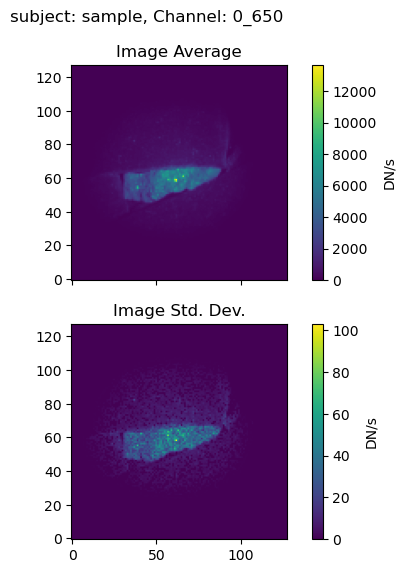

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:331: RuntimeWarning: invalid value encountered in multiply
  objpoints *= self.chkrsize
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:333: RuntimeWarning: invalid value encountered in divide
  


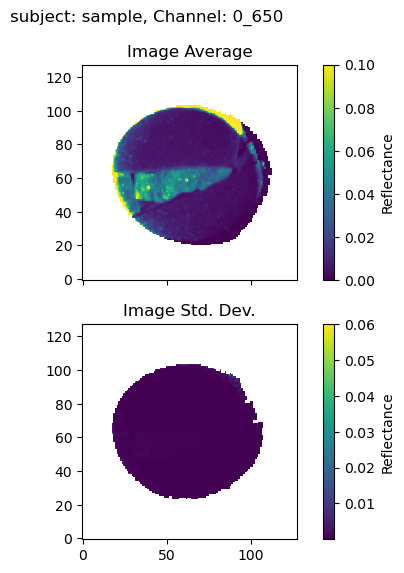

../data/sample/0_650
Mean image written to ../data/sample/0_650/650_mean_rfl.tif
Error image written to ../data/sample/0_650/650_error_rfl.tif


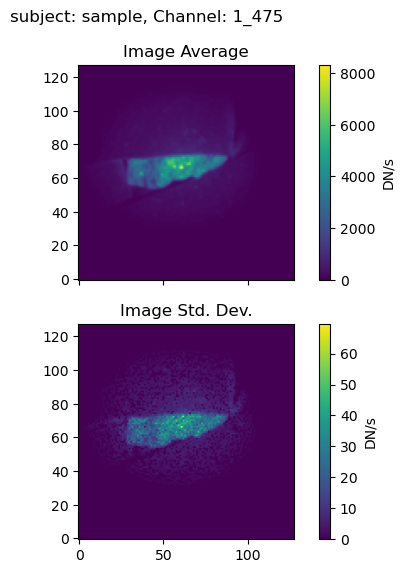

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:331: RuntimeWarning: invalid value encountered in multiply
  objpoints *= self.chkrsize
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:333: RuntimeWarning: invalid value encountered in divide
  


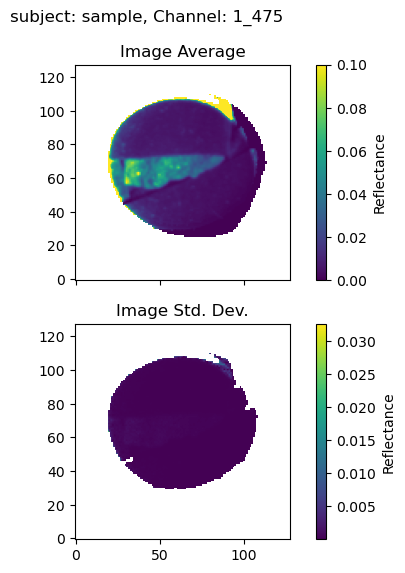

../data/sample/1_475
Mean image written to ../data/sample/1_475/475_mean_rfl.tif
Error image written to ../data/sample/1_475/475_error_rfl.tif


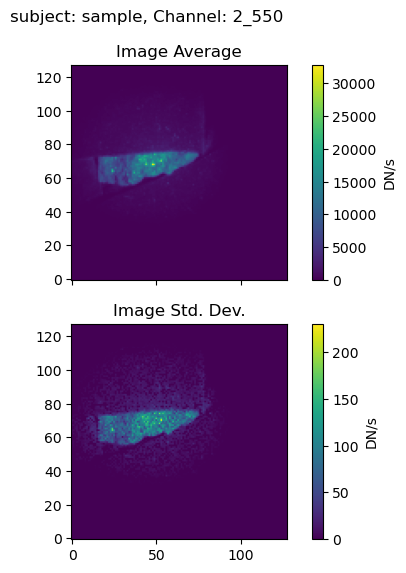

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:331: RuntimeWarning: invalid value encountered in multiply
  objpoints *= self.chkrsize
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:333: RuntimeWarning: invalid value encountered in divide
  


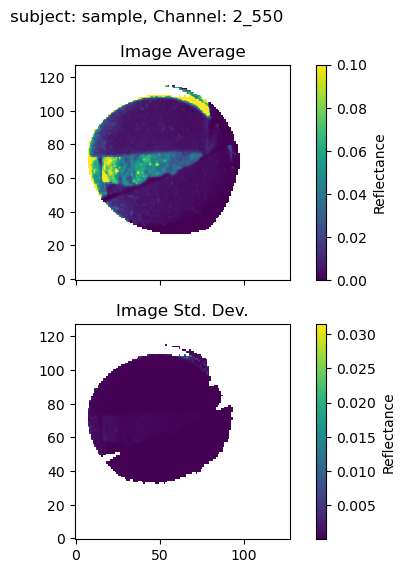

../data/sample/2_550
Mean image written to ../data/sample/2_550/550_mean_rfl.tif
Error image written to ../data/sample/2_550/550_error_rfl.tif


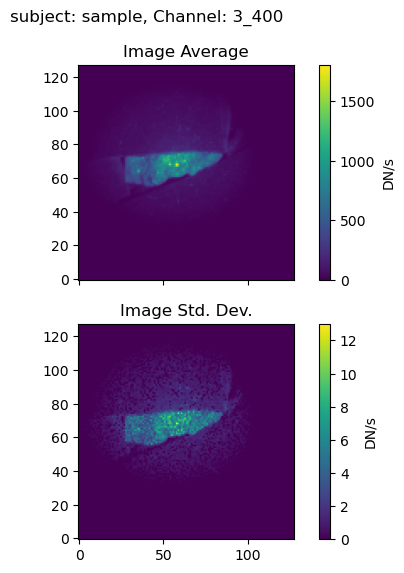

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:331: RuntimeWarning: invalid value encountered in multiply
  objpoints *= self.chkrsize
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:333: RuntimeWarning: invalid value encountered in divide
  


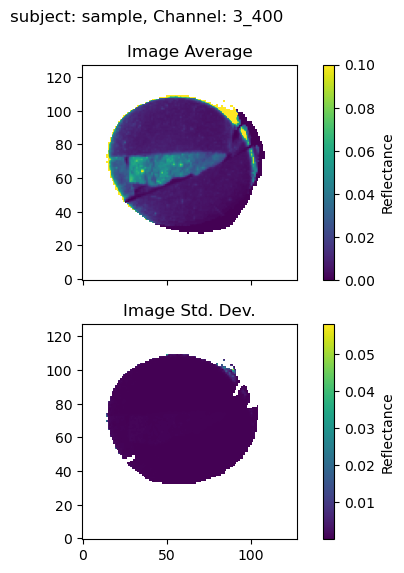

../data/sample/3_400
Mean image written to ../data/sample/3_400/400_mean_rfl.tif
Error image written to ../data/sample/3_400/400_error_rfl.tif


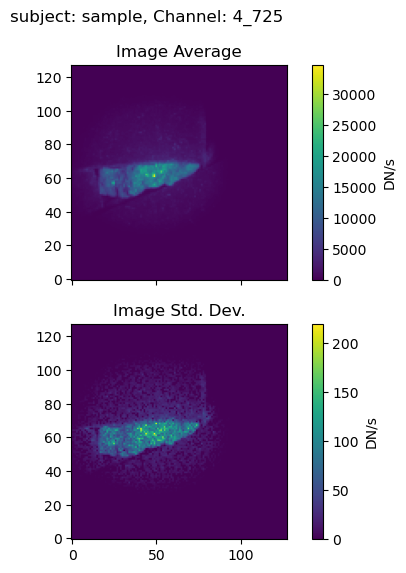

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:331: RuntimeWarning: invalid value encountered in multiply
  objpoints *= self.chkrsize
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:333: RuntimeWarning: invalid value encountered in divide
  


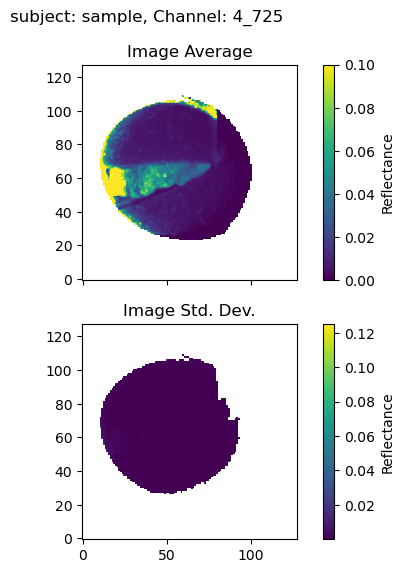

../data/sample/4_725
Mean image written to ../data/sample/4_725/725_mean_rfl.tif
Error image written to ../data/sample/4_725/725_error_rfl.tif


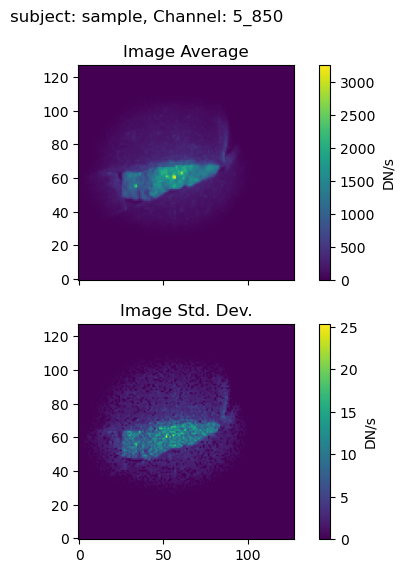

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:331: RuntimeWarning: invalid value encountered in multiply
  objpoints *= self.chkrsize
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:333: RuntimeWarning: invalid value encountered in divide
  


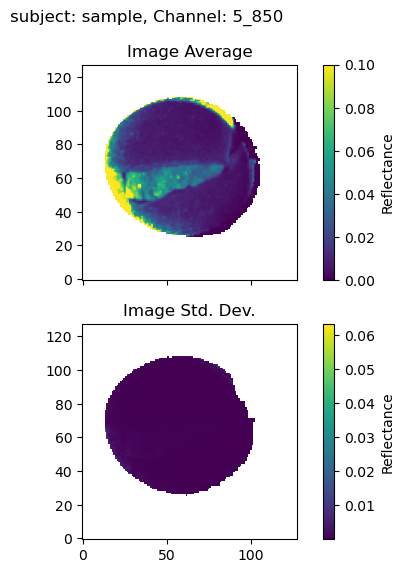

../data/sample/5_850
Mean image written to ../data/sample/5_850/850_mean_rfl.tif
Error image written to ../data/sample/5_850/850_error_rfl.tif


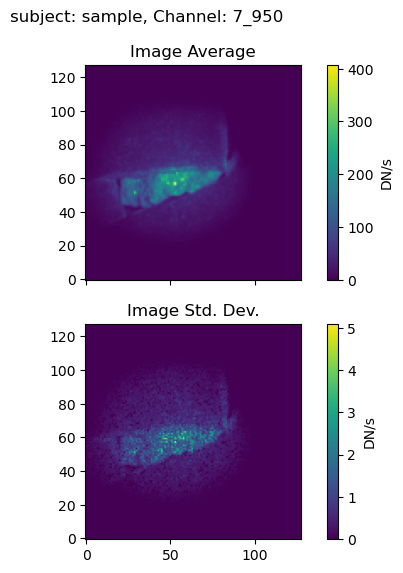

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:331: RuntimeWarning: invalid value encountered in multiply
  objpoints *= self.chkrsize
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:333: RuntimeWarning: invalid value encountered in divide
  


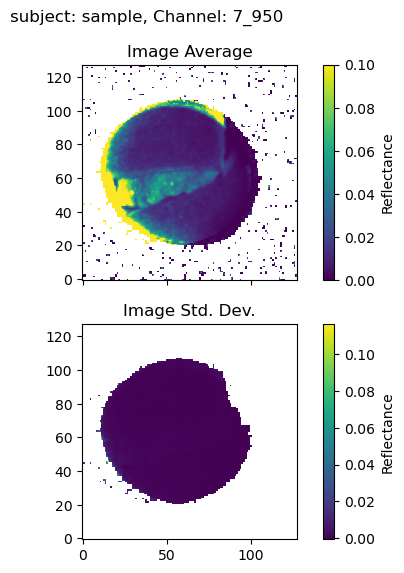

../data/sample/7_950
Mean image written to ../data/sample/7_950/950_mean_rfl.tif
Error image written to ../data/sample/7_950/950_error_rfl.tif


In [32]:
target = 'sample'
channels = sorted(list(Path('..', 'data',target).glob('[!.]*')))
reflectance = {}
for channel_path in channels:
    channel = channel_path.name
    # load the sample images
    smpl = osp.LightImage(target, channel)
    smpl.image_load()
    # load the sample dark frames
    dark_smpl = osp.DarkImage(target, channel)
    dark_smpl.image_load()
    # subtract the dark frame
    smpl.dark_subtract(dark_smpl)
    # apply exposure correction
    smpl.correct_exposure()
    smpl.image_display(roi=True)
    # apply calibration coefficients
    cali_coeff = cali_coeffs[channel]
    refl = osp.ReflectanceImage(smpl)
    refl.calibrate_reflectance(cali_coeff)
    refl.image_display(roi=True)
    # save the reflectance image
    refl.save_tiff()
    reflectance[channel] = refl
    

# Homography Calibration

Here we attempt to co-align images by finding the homography matrix between images of the calibration target cap writing.

- Load, average and bias correct geometric images
- choose destination/base image
- for each channel, find homography matrix mapping from channel/source to base
- apply image transformation for each channel.

Load the images

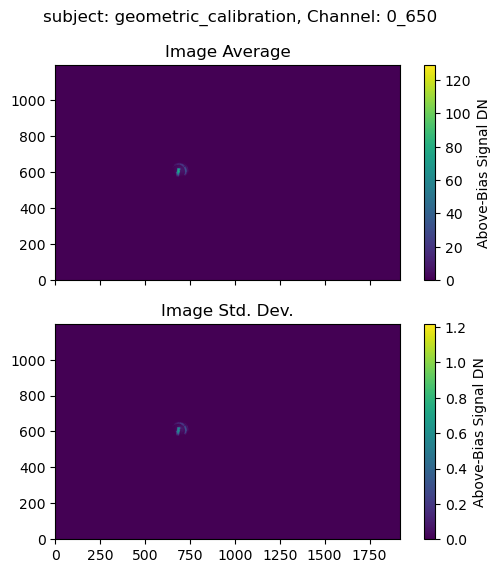

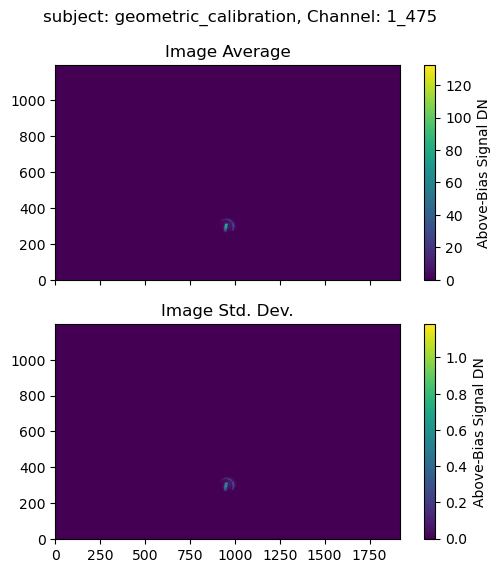

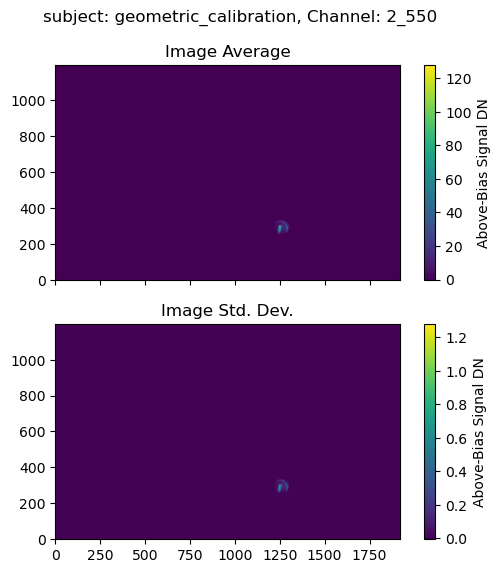

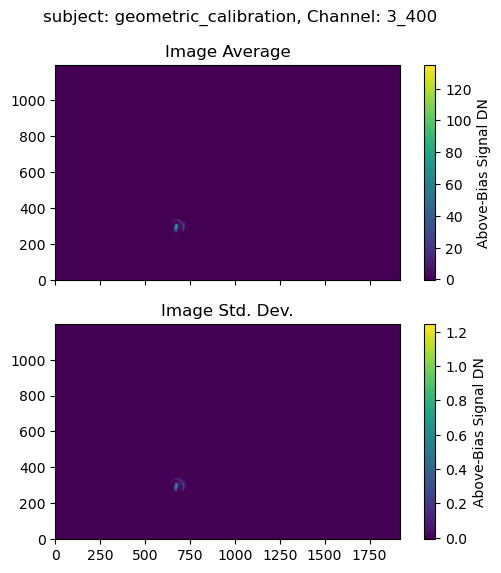

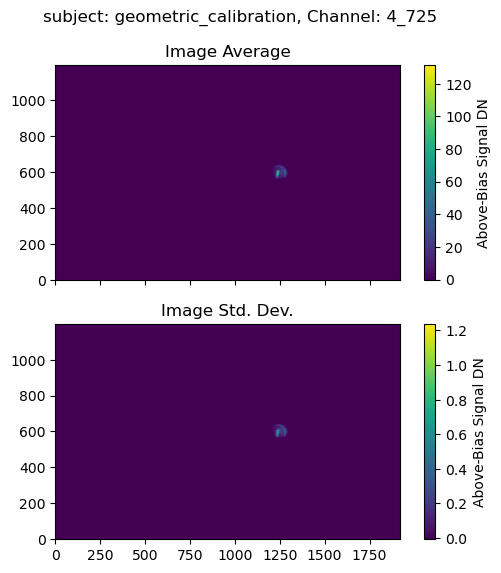

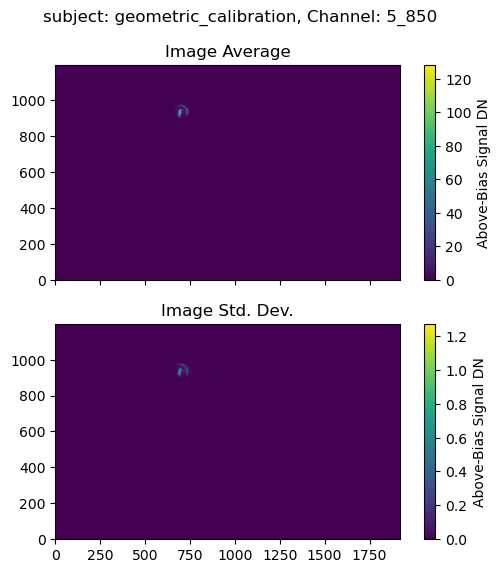

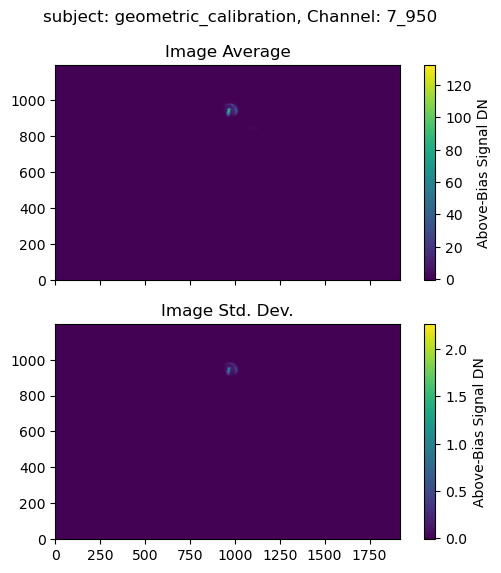

In [34]:
target = 'geometric_calibration'
channels = sorted(list(Path('..', 'data',target).glob('[!_]*')))
geocs = {}
for channel_path in channels:
    channel = channel_path.name
    # load the geometric calibration images
    geoc = osp.LightImage(target, channel)
    geoc.image_load()
    # load the geometric calibration dark frames
    dark_geoc = osp.DarkImage(target, channel)
    dark_geoc.image_load()
    # subtract the dark frame
    geoc.dark_subtract(dark_geoc)
    geoc.image_display()
    geocs[channel] = geoc

Learn transform

In [35]:
channels = list(geocs.keys())
destination = channels[0]
cali_dest = geocs[destination]
sample_dest = reflectance[destination]
for channel in channels:
    cali_src = geocs[channel]    
    learning_img = osp.CoAlignedImage(cali_src, cali_dest, roi=True)
    learning_img.find_homography(method='ORB')
    # # check the alignment
    # learning_img.align_images()
    # learning_img.image_display()

    sample_src = reflectance[channel]
    aligned_img = osp.CoAlignedImage(sample_src, sample_dest, homography=learning_img.homography, roi=True)
    aligned_img.align_images()
    # check the alignment
    aligned_img.align_images()
    aligned_img.image_display()


error: OpenCV(4.6.0) /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


Apply Transform

# Geometric Alignment
- Load, average and bias correct Geometric images
- Balance images (TBD)
- Extract camera geometric calibration coefficients (TBD)
- Apply image coregistration (TBD)

First we define a new class for storing and processing the geometric calibration images.

Then we get the geometric calibration coefficients for each camera.

In [ ]:
target = 'geometric_calibration'
channels = sorted(list(Path('..', 'data',target).glob('[!_]*')))
geocs = {}
for channel_path in channels:
    channel = channel_path.name
    # load the geometric calibration images
    geoc = osp.LightImage(target, channel)
    geoc.image_load()
    # load the geometric calibration dark frames
    dark_geoc = osp.DarkImage(target, channel)
    dark_geoc.image_load()
    # subtract the dark frame
    geoc.dark_subtract(dark_geoc)
    geoc.image_display()
    # # apply image balancing
    geoc = osp.GeoCalImage(geoc, roi=True)
    geoc.show_corners()
    geoc.calibrate_camera()
    geocs[channel] = geoc
    print('camera focal length (mm)')
    print(geoc.mtx[0][0] * 5.86E-6 * 1e3)
    print('translation vectors')
    print(geoc.tvecs)
    print('rotation vectors')
    print(geoc.rvecs)

Now we choose a destination image that we will map all other channels too, and we find the stereo calibration and perform co-alignment.

In [ ]:
channels = list(reflectance.keys())
destination = channels[0]
dest_geocal = geocs[destination]
for channel in channels:
    source_img = reflectance[channel]
    source_geocal = geocs[channel]
    aligned_img = osp.AlignedImage(source_img, source_geocal, dest_geocal)
    aligned_img.image_display()
    aligned_img.undistort()
    aligned_img.image_display()
    aligned_img.source_R, aligned_img.source_P, aligned_img.dest_R, aligned_img.dest_P = aligned_img.stereo_calibrate()
    aligned_img.img_ave = aligned_img.coalign()
    aligned_img.image_display()
